## Importing Libaries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import time 
import os

import geopy
from geopy.geocoders import Nominatim

from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
df = pd.read_csv("data_100000.csv", index_col="tree_id")
df = df.sort_index()

## Dataframe detail informations

In [3]:
"""
Just uncomment and run the program the code to view the details required
"""
# df.head()           # view the dataframe
# df.info()           # view the columns data types and row nan details
# df.describe()       # view the dataframe mean, count, std, and other statics
df.dtypes           # view the columns data types
# df.columns          # view the name of every avaliable dataframe column names.

created_at     object
block_id        int64
the_geom       object
tree_dbh        int64
stump_diam      int64
curb_loc       object
status         object
health         object
spc_latin      object
spc_common     object
steward        object
guards         object
sidewalk       object
user_type      object
problems       object
root_stone     object
root_grate     object
root_other     object
trnk_wire      object
trnk_light     object
trnk_other     object
brnch_ligh     object
brnch_shoe     object
brnch_othe     object
address        object
zipcode         int64
zip_city       object
cb_num          int64
borocode        int64
boroname       object
cncldist        int64
st_assem        int64
st_senate       int64
nta            object
nta_name       object
boro_ct         int64
state          object
latitude      float64
longitude     float64
x_sp          float64
y_sp          float64
dtype: object

## Spliting 'Latitude' and 'longitude'

In [4]:
df.the_geom = df.the_geom.str.replace('(','')
df.the_geom = df.the_geom.str.replace(')','')

df[["drop_point","longitude", "latitude"]]=df['the_geom'].str.split(' ', 2, expand=True)

df_org = df.copy()
df = df.drop(columns=['the_geom',   # combine geo location 
                      'drop_point', # after geo split extra column
                      'stump_diam', # column consist of only value '0'
                      "status",     # column consist of only value 'Alive'
                      "state",      # column consist of only value 'New York'
                      "problems"])  # other column with list of problem are present

<ipython-input-4-629de8b1cdf2>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.the_geom = df.the_geom.str.replace('(','')
<ipython-input-4-629de8b1cdf2>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.the_geom = df.the_geom.str.replace(')','')


In [5]:
# Verifying the if the column have the correct data type

col = "tree_dbh"
for col in df.columns:
    print(col)
    print(df[f"{col}"].dtypes,':', df[df.notnull()][f"{col}"].head(1).values[0])
    print()

created_at
object : 05/19/2015

block_id
int64 : 501911

tree_dbh
int64 : 3

curb_loc
object : OnCurb

health
object : Poor

spc_latin
object : Betula pendula

spc_common
object : silver birch

steward
object : 3or4

guards
object : None

sidewalk
object : NoDamage

user_type
object : TreesCount Staff

root_stone
object : No

root_grate
object : No

root_other
object : No

trnk_wire
object : No

trnk_light
object : No

trnk_other
object : No

brnch_ligh
object : No

brnch_shoe
object : No

brnch_othe
object : No

address
object : 1242 SPOFFORD AVENUE

zipcode
int64 : 10474

zip_city
object : Bronx

cb_num
int64 : 202

borocode
int64 : 2

boroname
object : Bronx

cncldist
int64 : 17

st_assem
int64 : 84

st_senate
int64 : 34

nta
object : BX27

nta_name
object : Hunts Point

boro_ct
int64 : 2009300

latitude
object : 40.81409208169762

longitude
object : -73.8891227827186

x_sp
float64 : 1014941.50389

y_sp
float64 : 235892.23299



## Veiwing the unique value avaliable in column 
---
* Looking for element to replace null value

In [6]:
for i in df.columns:
    print()
    print(f"********** {i} **********")
    print(df[f'{i}'].unique())


********** created_at **********
['05/19/2015' '05/20/2015' '05/21/2015' '05/22/2015' '05/24/2015'
 '05/26/2015' '05/27/2015' '05/28/2015' '05/29/2015' '05/30/2015'
 '05/31/2015' '06/01/2015' '06/02/2015' '06/03/2015' '06/04/2015'
 '06/05/2015' '06/06/2015' '06/07/2015' '06/08/2015' '06/09/2015'
 '06/10/2015' '06/11/2015' '06/12/2015' '06/13/2015' '06/14/2015'
 '06/15/2015' '06/16/2015' '06/17/2015' '06/18/2015' '06/19/2015'
 '06/20/2015' '06/21/2015' '06/22/2015' '06/23/2015' '06/24/2015'
 '06/25/2015' '06/26/2015' '06/27/2015' '06/28/2015' '06/29/2015'
 '06/30/2015' '07/01/2015' '07/02/2015' '07/03/2015' '07/04/2015'
 '07/05/2015' '07/06/2015' '07/07/2015' '07/08/2015' '07/09/2015'
 '07/10/2015' '07/11/2015' '07/12/2015' '07/13/2015' '07/14/2015'
 '07/15/2015' '07/16/2015' '07/17/2015' '07/18/2015' '07/19/2015'
 '07/20/2015' '07/21/2015' '07/22/2015' '07/23/2015' '07/24/2015'
 '07/25/2015' '07/26/2015' '07/27/2015' '07/28/2015' '07/29/2015'
 '07/30/2015' '07/31/2015' '08/01/2015' '0

['40.81409208169762' '40.81410004949196' '40.814107379300225' ...
 '40.551220596186496' '40.746301078490575' '40.74664019125302']

********** longitude **********
['-73.8891227827186' '-73.88906961825997' '-73.8890207063314' ...
 '-74.21268932105565' '-73.85485013584906' '-73.85371239239751']

********** x_sp **********
[1014941.50389  1014956.21646  1014969.7522   ...  925143.776993
 1024469.30406  1024784.35265 ]

********** y_sp **********
[235892.23299  235895.154572 235897.84223  ... 140172.790243 211207.572713
 211331.646612]


## Null values graphical presentatin and understanding

Drop the column where missing value is above 10% else just remove row
Data size: 100000
Data limit:  10000


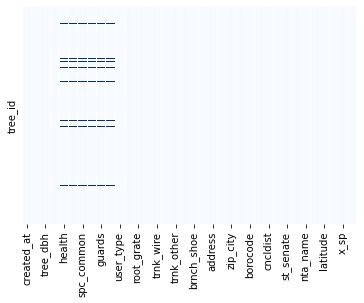

In [7]:
print('Drop the column where missing value is above 10% else just remove row')
print('Data size:', df.shape[0])
print('Data limit: ',int(0.1* df.shape[0]))

sn.heatmap(df.isnull(), yticklabels= False, cbar= False, cmap= 'Blues'); 

In [8]:
print(df.shape[0])
df.isna().sum()     # view rows with missing values

100000


created_at       0
block_id         0
tree_dbh         0
curb_loc         0
health        4993
spc_latin     4992
spc_common    4992
steward       4992
guards        4992
sidewalk      4992
user_type        0
root_stone       0
root_grate       0
root_other       0
trnk_wire        0
trnk_light       0
trnk_other       0
brnch_ligh       0
brnch_shoe       0
brnch_othe       0
address          0
zipcode          0
zip_city         0
cb_num           0
borocode         0
boroname         0
cncldist         0
st_assem         0
st_senate        0
nta              0
nta_name         0
boro_ct          0
latitude         0
longitude        0
x_sp             0
y_sp             0
dtype: int64

## Feature Engineering

In [9]:
df.created_at =  df.created_at.astype('datetime64[ns]')   # Change the created_ata data type to datetime
df.longitude = df.longitude.astype(float)                 # Convert the longitude into float
df.latitude = df.latitude.astype(float)                   # Convert the latitude into float
df.guards = df.guards.fillna('Unsure')                    # Replace 'nan' to 'Unsure'

for i in df[["health", "spc_latin", "spc_common", "steward",
             "sidewalk", "user_type"]]:
    
    df[f'{i}'] = df[f'{i}'].fillna('Unavaliable')               # Replace 'nan' to 'Unavaliable'

# Categorize the columns getting the first string to catagorize
df['latin_catagory']  = df['spc_latin'].str.split().str[0]
df['common_catagory'] = df['spc_common'].str.split().str[0]

In [10]:
df.isna().sum()     # view rows with missing values

created_at         0
block_id           0
tree_dbh           0
curb_loc           0
health             0
spc_latin          0
spc_common         0
steward            0
guards             0
sidewalk           0
user_type          0
root_stone         0
root_grate         0
root_other         0
trnk_wire          0
trnk_light         0
trnk_other         0
brnch_ligh         0
brnch_shoe         0
brnch_othe         0
address            0
zipcode            0
zip_city           0
cb_num             0
borocode           0
boroname           0
cncldist           0
st_assem           0
st_senate          0
nta                0
nta_name           0
boro_ct            0
latitude           0
longitude          0
x_sp               0
y_sp               0
latin_catagory     0
common_catagory    0
dtype: int64

## Encoding the "BINARY CATAGORICAL" Variable

In [11]:
col_lst = ["curb_loc", "sidewalk", "root_stone", "root_grate","root_other", "trnk_wire",
           "trnk_light", "trnk_other", "brnch_ligh", "brnch_shoe", "brnch_othe"]

In [12]:
"""
curb_loc
OnCurb = 1

sidewalk
NoDamage = 1

No = 0
"""

for col in col_lst:
    df[f"{col}"] = df[f"{col}"]
    le = LabelEncoder()
    df[f"{col}"] = le.fit_transform(df[f"{col}"])

In [13]:
if not os.path.exists("data_files"):
    os.makedirs("data_files")

In [14]:
df = df[['created_at', 'block_id', 
         'latitude', 'longitude', 'x_sp', 'y_sp',
         'address', 'zipcode', 'zip_city', 'cb_num', 'borocode', 'boroname',
         'spc_latin', 'latin_catagory',
         'spc_common', 'common_catagory', 
         'tree_dbh', 'health', 'steward', 'guards', 'user_type', 'cncldist',
         'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct',
         'curb_loc', 'sidewalk', 'root_stone', 'root_grate', 'root_other',
         'trnk_wire', 'trnk_other','trnk_light', 'brnch_ligh', 'brnch_shoe', 'brnch_othe' 
         ]] 

(df.shape)

(100000, 38)

In [15]:
df.to_csv(r'./data_files/data_clean_GOOD_ENOUGH.csv', index=False)

## Correlation between every columns with each other

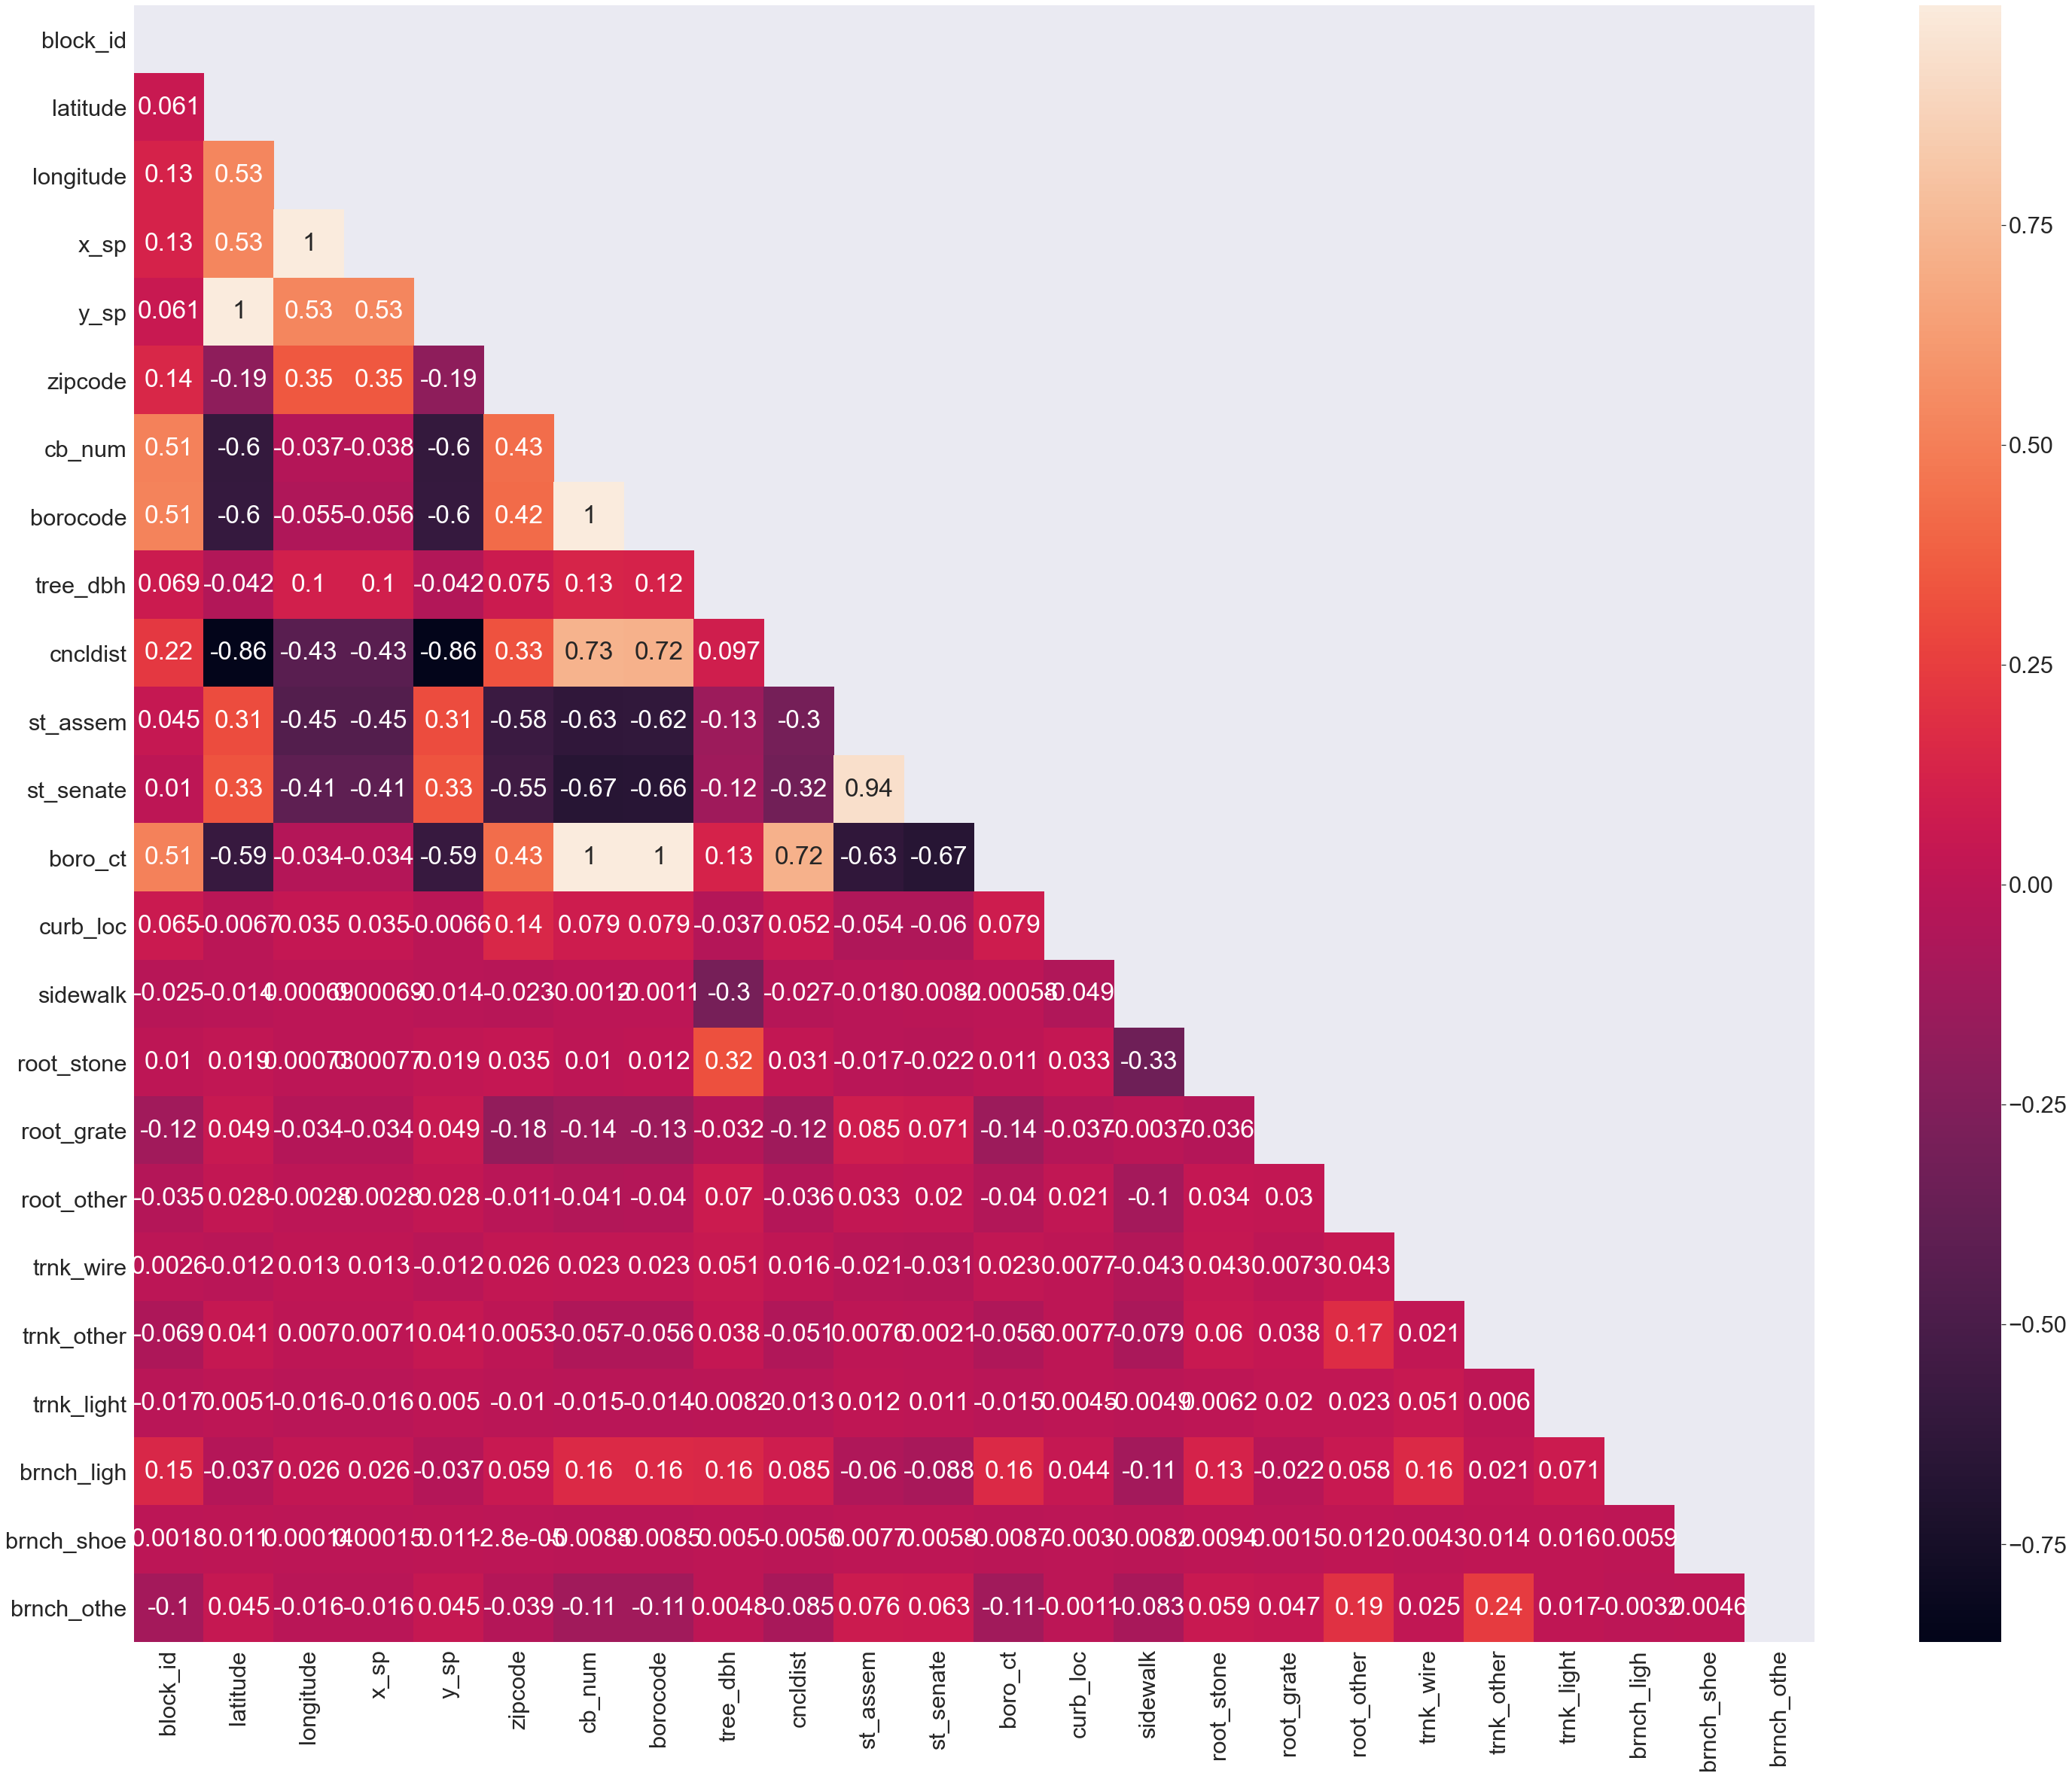

In [16]:
## Correlation every feature
corr = df.corr()
sn.set(font_scale=2.8)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (50,40))
sn.heatmap(corr, annot=True,mask=mask);

## Individual column correlation with other column.

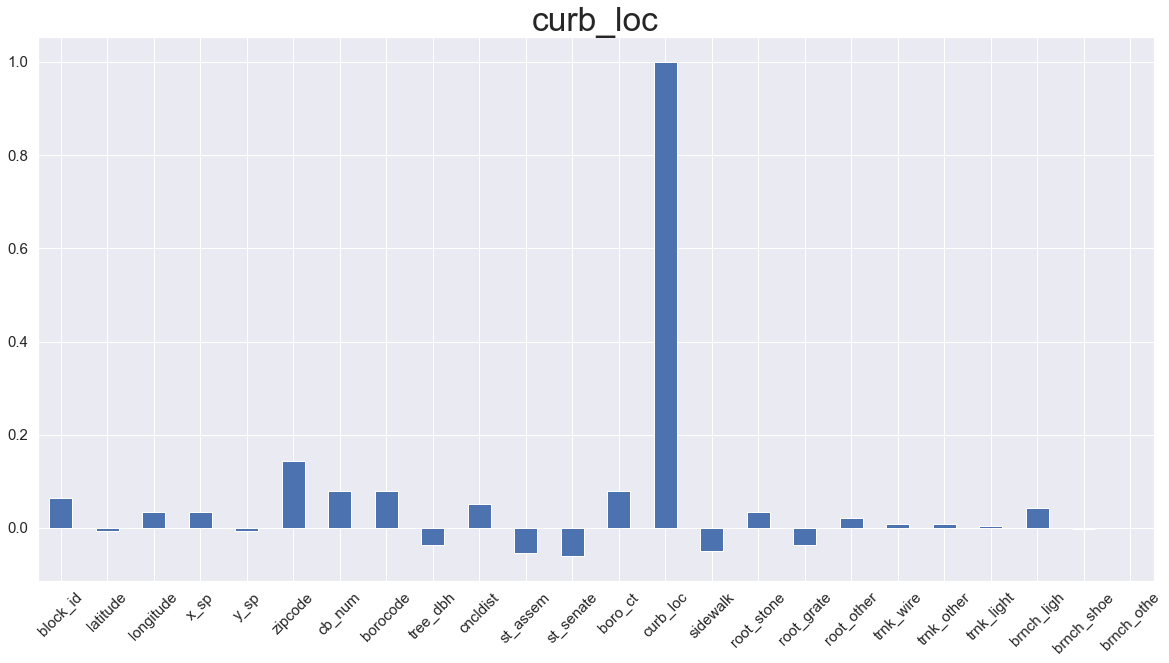

In [17]:
## Correlation with independent variable (Note: Models like RF are not linear like these)

fig = "curb_loc"
df.corrwith(df[f"{fig}"]).plot.bar(figsize = (20, 10), 
                                                        title = f"{fig}",
                                                        fontsize = 15,
                                                        rot = 45, grid = True);

## Histrogram analysis (Data Dristibution)

In [ ]:
column_headers = df.columns
dataset2 = df
feature_col = dataset2.shape[1]
plt_col = 4
plt_row = int((len(column_headers)/plt_col) + 1)


fig = plt.figure(figsize=(10, 10))
plt.suptitle('Subtitle for diagram', fontsize=20)
for i in range(feature_col):
    plt.subplot(plt_row, plt_col, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    vals = np.size(dataset2.iloc[:, i].unique())
    
    # This help ploting process easier
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.set_tight_layout(True)